In [1]:
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from scipy import special
from scipy import stats

In [2]:
def plot_prior_and_posterior(r, s, n, k):
    p = np.arange(0, 1, 0.01)
    prior = stats.beta.pdf(p, r, s)
    posterior = stats.beta.pdf(p, r+k, s+n-k)
    plt.plot(p, prior, lw=2, color='gold', label = 'Prior: beta (r, s)')
    plt.plot(p, posterior, lw=2, color='darkblue', label = 'Posterior: beta(r+k, s+n-k)')
    plt.legend(bbox_to_anchor=(1.6, 1.02))
    ymax = max(max(prior), max(posterior))
    plt.ylim(-0.3, ymax+0.1)
    plt.xlim(0, 1)
    plt.scatter(r/(r+s), -0.1, marker='^', s=40, color='gold')
    plt.scatter((r+k)/(r+s+n), -0.1, marker='^', s=40, color='darkblue')
    plt.scatter(k/n, -0.02, s=30, color='red')
    plt.xlabel('$p$')
    plt.title('Prior, and Posterior Given $S_n = k$ (red dot at $k/n$)');

In [3]:
# Support embedding YouTube Videos in Notebooks
from IPython.display import YouTubeVideo

# Week 12 Part 1 #

# <span style="color: darkblue">Tossing a Random Coin</span> #

## Reading: Review ###

Suppose you toss a coin that has probability $X$ of landing heads, and suppose $X$ has a density.

- The chance of [heads on one toss](http://prob140.org/textbook/Chapter_20/03_Independence_Revisited.html#One-Toss-of-a-Random-Coin) is $E(X)$
- The [posterior density](http://prob140.org/textbook/Chapter_20/02_Prior_and_Posterior.html#Posterior-Density) of $X$ given the data is proportional to the prior times the likelihood

In [4]:
YouTubeVideo("5mgbCGJ6mw0")

## Reading: Assumptions and Notation ##

- The [precise statement](http://prob140.org/textbook/Chapter_21/01_Updating_and_Prediction.html#The-Experiment) of what it means to "toss a random coin"

Keep in mind that the coin is chosen once, and then the same coin is tossed $n$ times. 

## Reading: Updating Your Opinion ##

- Beta prior and binomial likelihood together lead to a [beta posterior density](http://prob140.org/textbook/Chapter_21/01_Updating_and_Prediction.html#Updating:-The-Posterior-Distribution-of-$X$-Given-$S_n$)
- That is why the betas are a family of ["conjugate"](http://prob140.org/textbook/Chapter_21/01_Updating_and_Prediction.html#Conjugate-Prior) priors for the binomial likelihood

The figure produced by running the cell below shows how the data change your opinion about $X$, the chance that the coin lands heads.
- The gold curve is the beta prior density of $X$; the gold triangle marks its expectation
- The red dot is the observed proportion of heads
- The blue curve is the beta posterior density of $X$, given this proportion of heads; the blue triangle marks its expectation

Keep `n` and `k` fixed in the beginning, and change `r` and `s`. At least once, choose your values so that the prior expectation is quite far from the observed proportion 0.7. This will demonstrate what might happen if your prior belief is far from reflecting the reality.

Then increase `n`, and increase `k` in such a way that the proportion of heads remains fixed at 0.7 (e.g. `n=100` and `k=70`). Look what happens to the spread in the distributions.

And then play around with the parameters and observed proportions as you wish. The code might not handle very large or very extreme values well, but overall, the following should be clear:

**The posterior distribution gets pulled away from the prior towards the observed proportion.**

Prior Mean: 0.625
Posterior Mean: 0.667
Observed Proportion: 0.7


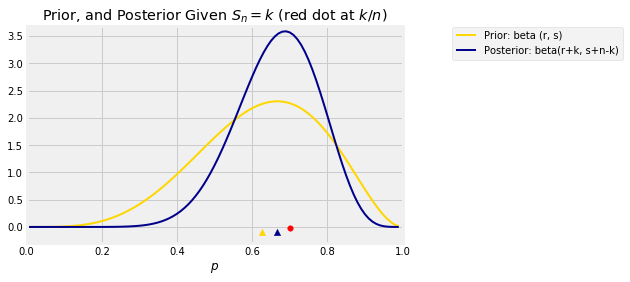

In [4]:
# Prior: beta (r, s)
# Given: S_n = k
# Posterior: beta (r+k, s+(n-k))

# Change these values
r = 5
s = 3
n = 10
k = 7

# Leave these lines alone
plot_prior_and_posterior(r, s, n, k)
print('Prior Mean:', round(r/(r+s), 3))
print('Posterior Mean:', round((r+k)/(r+s+n), 3))
print('Observed Proportion:', round(k/n, 3));

### Questions ###

**Question 1:** I have a coin that I believe lands heads with a probability that has a beta $(3, 7)$ distribution. The coin is tossed 10 times. Given that 6 of the 10 tosses land heads, how should I change my opinion? That is, what distribution should reflect my opinion after seeing those results?

<details>
    <summary>Answer 1</summary>
    beta (9, 11)
</details>  
         
**Question 2:** Continuing Question 1, what was my expected probability of heads for the coin, before I saw the results of the tosses? Give a decimal value.
<details>
    <summary>Answer 2</summary>
    0.3
</details>  

**Question 3:** Continuing Questions 1 and 2, what is my expected probability of heads for the coin, after seeing the results of the tosses? Give a decimal value.
<details>
    <summary>Answer 3</summary>
    0.45
</details>  

# <span style="color: darkblue">Predicting the Next Toss</span> #

In [5]:
YouTubeVideo("ny5OqcC4DQ0")

## Reading: Predicted Distribution ##

- [Prediction](http://prob140.org/textbook/Chapter_21/01_Updating_and_Prediction.html#Prediction:-The-Distribution-of-$S_{n+1}$-Given-$S_n$) for toss $n+1$, given the results of the first $n$ tosses and of course the prior

**Question 4:** Continuing Question 1, what is my predicted probability that the coin will land heads if it is tossed one more time, given that there were 6 heads in the first 10 tosses?
<details>
    <summary>Answer 4</summary>
    0.45
</details>  

## The next Part follows directly from this, so I suggest just moving on to it. ##